## eScooter Pilot Impact to 2018 NiceRide Trips

**Question:** In July of 2018, the city of Minneapolis piloted an eScooter program from August through November 2018. Did the introduction of this program have an impact on NiceRide ridership? 

- Sought two measures of ridership: Total rides and trip duration
    - Total rides is an indicator for demand for NiceRide bikes
    - Due to the fee structure, longer rides will cost a user more potentially providing extra revenue to the organizations.<br>

 
- Compared two 2018 time periods: April through July and August through November.<br>


- Conducted t-test for each ridership measure.<br>


    
- Comparing number of rides across the two time periods yielded a **pvalue=0.3812340689599901**
     - By this measure, there is not a significant difference in the average number of rides before and after the indruduction of eScooters.
     - This test may be limited in the number of data points since there were only 8 months of ride totals to compare.
     - Further analysis and comparison to previous years is needed to make a more definitive conclusion by this measure.<br>
     
     
- Comparing trip duration across the two time periods yielded a **pvalue=0.05364066980903367**
     - Here we see a statically significant difference in the average trip duration before and after the introduction of eScooters. 
     - This difference could be attributed to other factors like weather or changing construction projects and would need to be used in conjunction with other measures to come to a more definitive conclusion.<br>
         
         
- While we cannot definitively say from these calculations along the eScooters impacte to NiceRide ridership, it may be part of the explanation as to why there was a 15% decline in ridership from 2017 to 2018.
    
    
    
    

    



In [1]:
#Read in dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
from dateutil import parser

#read in 2018 monthly data

apr2018 = pd.read_csv("Project1CSV/Niceride 2010to2018/NR2018/201804-niceride-tripdata.csv", low_memory=False)
may2018 = pd.read_csv("Project1CSV/Niceride 2010to2018/NR2018/201805-niceride-tripdata.csv", low_memory=False)
jun2018 = pd.read_csv("Project1CSV/Niceride 2010to2018/NR2018/201806-niceride-tripdata.csv", low_memory=False)
jul2018 = pd.read_csv("Project1CSV/Niceride 2010to2018/NR2018/201807-niceride-tripdata.csv", low_memory=False)
aug2018 = pd.read_csv("Project1CSV/Niceride 2010to2018/NR2018/201808-niceride-tripdata.csv", low_memory=False)
sep2018 = pd.read_csv("Project1CSV/Niceride 2010to2018/NR2018/201809-niceride-tripdata.csv", low_memory=False)
oct2018 = pd.read_csv("Project1CSV/Niceride 2010to2018/NR2018/201810-niceride-tripdata.csv", low_memory=False)
nov2018 = pd.read_csv("Project1CSV/Niceride 2010to2018/NR2018/201811-niceride-tripdata.csv", low_memory=False)

             
                      
                      

### Comparing trip count for the time periods between April - July and August - November 2018

In [37]:
#Create variables used to analys rides for each month.

#calculate montly total rides
apr_total = apr2018["start_time"].count()
may_total = may2018["start_time"].count()
jun_total = jun2018["start_time"].count()
jul_total = jul2018["start_time"].count()
aug_total = aug2018["start_time"].count()
sep_total = sep2018["start_time"].count()
oct_total = oct2018["start_time"].count()
nov_total = nov2018["start_time"].count()


#calculate testing period averages
apr_jul_avg = (apr_total + may_total + jun_total + jul_total) / 4
aug_nov_avg = (aug_total + sep_total + oct_total + nov_total) / 4




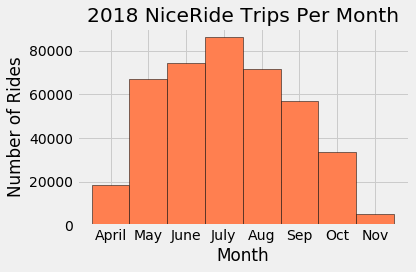

In [28]:
#plot average rides per month
plt.style.use('fivethirtyeight')

x1 = ['April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov']
monthly_totals = [apr_total, may_total, jun_total, jul_total, aug_total, sep_total, oct_total, nov_total]

plt.bar(x1, monthly_totals, width=1, align="center",color="coral", edgecolor="black")
plt.title("2018 NiceRide Trips Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Rides")


plt.tight_layout()

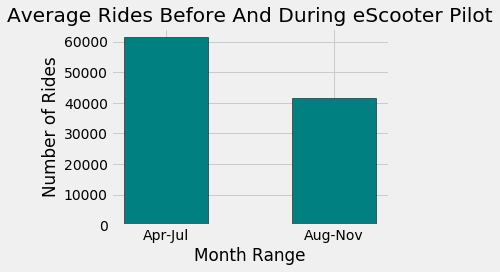

In [24]:
#Plot avergage rides over the two time periodes in question.
plt.style.use('fivethirtyeight')
x2 = ["Apr-Jul", "Aug-Nov"]
period_avgs = [apr_jul_avg, aug_nov_avg]

plt.bar(x2,period_avgs, width=.5, align="center", edgecolor="black", color="teal")
plt.title("Average Rides Before And During eScooter Pilot")
plt.xlabel("Month Range")
plt.ylabel("Number of Rides")

plt.tight_layout()

### Comparing trip duration for the time periods between April - July and August - November 2018

In [17]:
#Create varialbes and data frames used for plotting.

#calculate median trip duration for each month
apr_dur_avg = apr2018["tripduration"].median()
may_dur_avg = may2018["tripduration"].median()
jun_dur_avg = jun2018["tripduration"].median()
jul_dur_avg = jul2018["tripduration"].median()
aug_dur_avg = aug2018["tripduration"].median()
sep_dur_avg = sep2018["tripduration"].median()
oct_dur_avg = oct2018["tripduration"].median()
nov_dur_avg = nov2018["tripduration"].median()



#concantinate each month's dataframe to create the two time periods being examined. 
frames1 = [apr2018, may2018, jun2018, jul2018]
frames2 = [aug2018, sep2018, oct2018, nov2018]

apr_jul_df = pd.concat(frames1)
aug_nov_df = pd.concat(frames2)

#calculate median for each time period.
apr_jul_dur_med = apr_jul_df["tripduration"].median()
aug_nov_dur_med = aug_nov_df["tripduration"].median()


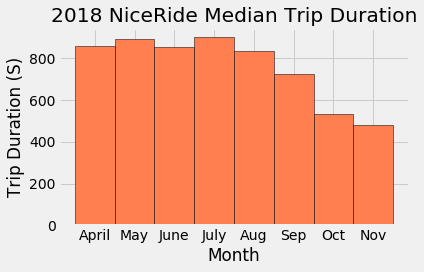

In [25]:
#Plot median trip duration for each month. 

montly_dur_avg = [apr_dur_avg, may_dur_avg, jun_dur_avg, jul_dur_avg, aug_dur_avg, sep_dur_avg, oct_dur_avg, nov_dur_avg]

plt.bar(x1, montly_dur_avg, width=1, align="center",color="coral", edgecolor="black")
plt.title("2018 NiceRide Median Trip Duration")
plt.xlabel("Month")
plt.ylabel("Trip Duration (S)")
plt.tight_layout()

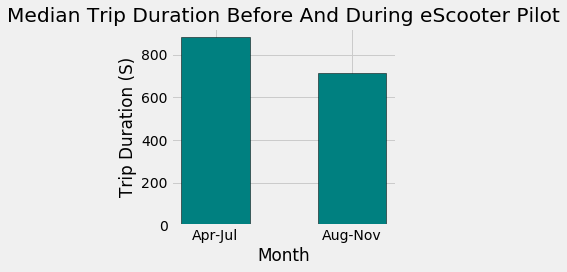

In [33]:



period_med_dur = [apr_jul_dur_med, aug_nov_dur_med]

plt.bar(x2, period_med_dur, width=.5, align="center",color="teal", edgecolor="black")
plt.title("Median Trip Duration Before And During eScooter Pilot")
plt.xlabel("Month")
plt.ylabel("Trip Duration (S)")
plt.tight_layout()

### T-Tests for number of rides and average trip duration comparing the time periods of  April - July and August - November 2018

In [31]:
#create create two series containing the total number of rides in each month in order to compare the two time periods
apr_jul = [apr_total, may_total, jun_total, jul_total]
aug_nov = [aug_total, sep_total, oct_total, nov_total]

#Execute t-test for number of rides in each time period.
stats.ttest_ind(apr_jul, aug_nov, equal_var=False)

Ttest_indResult(statistic=0.9448450344256898, pvalue=0.3812340689599901)

In [21]:
#Execute t-test for trip duration in each time period. 
stats.ttest_ind(apr_jul_df["tripduration"], aug_nov_df["tripduration"], equal_var=False)

Ttest_indResult(statistic=-1.9297328795615096, pvalue=0.05364066980903367)